In [47]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [48]:
weather_api_key = "09d8acc7b16ab519e916669958d4ecf7"

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 657


In [50]:
# Set the URL Base
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create Counters
record_count = 1
set_count = 1

In [51]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [52]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          
    except:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | severo-yeniseyskiy
Processing Record 5 of Set 1 | sambava
Processing Record 6 of Set 1 | ouegoa
Processing Record 7 of Set 1 | yarada
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | middelburg
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | miri
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | zvenigovo
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | busselton
Proce

Processing Record 41 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 4 | damphu
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | wexford
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | waipawa
Processing Record 47 of Set 4 | staritsa
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | leeuwarden
Processing Record 0 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 1 of Set 5 | betong
Processing Record 2 of Set 5 | taunton
Processing Record 3 of Set 5 | poli
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | neuquen
Processing Record 6 of Set 5 | hobart
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | mbabane
Processing Record 9 of Set 5 | belaya gora
Processing Record 10 of Set 5 | roebourne
Processing Record 11 of Set 5 | aizpute
Processing Record 12 of Set 5 | madimba
Processing Record 13 of Set 5 | arkhangelsk
Processing R

Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | tolbazy
Processing Record 32 of Set 8 | santa isabel do rio negro
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | havoysund
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | carauari
Processing Record 38 of Set 8 | mareeba
Processing Record 39 of Set 8 | chulman
Processing Record 40 of Set 8 | mithi
Processing Record 41 of Set 8 | bornheim
Processing Record 42 of Set 8 | whitefish
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | kieta
Processing Record 45 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 8 | komsomolskiy
Processing Record 47 of Set 8 | marrakesh
Processing Record 48 of Set 8 | coihaique
Processing Record 49 of Set 8 | arlit
Processing Record 0 of Set 9 | itoman
Processing Record 1 of Set 9 | mau
Processing Record 2 of Set 9 | koundara
Processing Record 3 of Set

Processing Record 19 of Set 12 | dongsheng
Processing Record 20 of Set 12 | wanaka
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | lahij
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | booue
Processing Record 25 of Set 12 | mutoko
Processing Record 26 of Set 12 | tamandare
Processing Record 27 of Set 12 | malwan
City not found. Skipping...
Processing Record 28 of Set 12 | zalegoshch
Processing Record 29 of Set 12 | kidal
Processing Record 30 of Set 12 | ayaviri
Processing Record 31 of Set 12 | constitucion
Processing Record 32 of Set 12 | rock springs
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | guerrero negro
Processing Record 35 of Set 12 | haibowan
City not found. Skipping...
Processing Record 36 of Set 12 | srednekolymsk
Processing Record 37 of Set 12 | parla
Processing Record 38 of Set 12 | charyshskoye
Processing Record 39 of Set 12 | ayorou
Processing Record 40 of Set 12 | gonda
Pr

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [54]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,22.23,59,5,2.02,US,1681436282
1,castro,-24.7911,-50.0119,16.83,83,98,1.35,BR,1681436476
2,tuktoyaktuk,69.4541,-133.0374,-19.00,78,40,2.57,CA,1681436040
3,severo-yeniseyskiy,60.3725,93.0408,-12.56,90,100,3.08,RU,1681436181
4,sambava,-14.2667,50.1667,23.17,91,11,1.86,MG,1681436478


In [55]:
# Export the city data frame into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.23,59,5,2.02,US,1681436282
1,castro,-24.7911,-50.0119,16.83,83,98,1.35,BR,1681436476
2,tuktoyaktuk,69.4541,-133.0374,-19.00,78,40,2.57,CA,1681436040
3,severo-yeniseyskiy,60.3725,93.0408,-12.56,90,100,3.08,RU,1681436181
4,sambava,-14.2667,50.1667,23.17,91,11,1.86,MG,1681436478


In [56]:
# Build the dataframe to store the latitudes and temperatures for each city
lat_temp_df = city_data_df.loc[:, ["Lat", "Max Temp"]]
lat_temp_df

,Lat,Max Temp
City_ID,,
0,42.6001,22.23
1,-24.7911,16.83
2,69.4541,-19.00
3,60.3725,-12.56
4,-14.2667,23.17
...,...,...
604,39.7196,2.31
605,4.1363,27.19
606,-20.2078,24.49


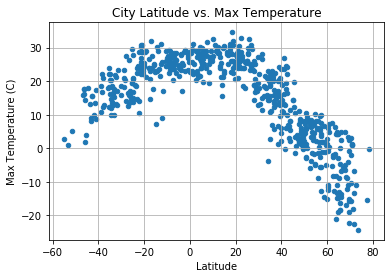

In [57]:
# Build Scatterplot
lat_temp_df.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

In [58]:
# Save the figure
plt.savefig("output_data/Fig1.png")

<Figure size 432x288 with 0 Axes>

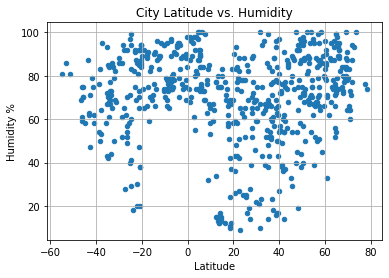

In [59]:
# Build the dataframe to hold latitude and humidity for each city
lat_humid_df = city_data_df.loc[:,["Lat", "Humidity"]]

lat_humid_df.plot.scatter("Lat", "Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")
plt.grid()

In [60]:
# Save the figure
plt.savefig("output_data/Fig2.png")

<Figure size 432x288 with 0 Axes>

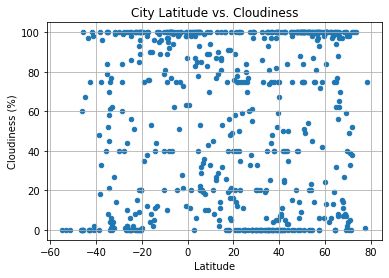

In [61]:
# Build the dataframe to hold latitude and humidity for each city
lat_cloud_df = city_data_df.loc[:,["Lat", "Cloudiness"]]

# Build Scatterplot
lat_cloud_df.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

In [62]:
# Save the figure
plt.savefig("output_data/Fig3.png")

<Figure size 432x288 with 0 Axes>

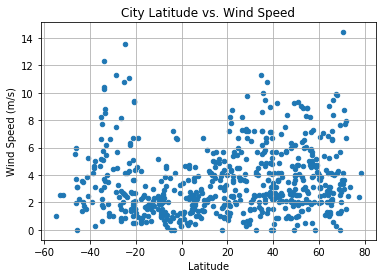

In [63]:
# Build the dataframe to hold latitude and humidity for each city
lat_wind_df = city_data_df.loc[:,["Lat", "Wind Speed"]]

# Build Scatter plot
lat_wind_df.plot.scatter("Lat", "Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

In [64]:
# Save the figure
plt.savefig("output_data/Fig4.png")

<Figure size 432x288 with 0 Axes>

In [65]:
# Write Function for Linear Regression
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = [float(slope)*x_values[i]+intercept for i in range(len(x_values))]
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       #Getting ready to write the equation on the graph

    plt.scatter(x_values,y_values)          #Create scatter plot 
    plt.plot(x_values,regress_values,"b-")      # Plotting red line
    plt.xlabel("Latitude")
    
    print(f"The r value is: {rvalue}")

    return line_eq
    

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

North_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.23,59,5,2.02,US,1681436282
2,tuktoyaktuk,69.4541,-133.0374,-19.00,78,40,2.57,CA,1681436040
3,severo-yeniseyskiy,60.3725,93.0408,-12.56,90,100,3.08,RU,1681436181
6,yarada,17.6500,83.2667,29.97,57,19,4.11,IN,1681436480
7,cherskiy,68.7500,161.3000,-12.17,78,8,2.99,RU,1681436480
...,...,...,...,...,...,...,...,...,...
602,port arthur,38.8000,121.2667,13.12,78,82,4.85,CN,1681436857
604,saravan,39.7196,45.6483,2.31,97,100,2.27,AM,1681436858
605,meulaboh,4.1363,96.1285,27.19,81,85,1.31,ID,1681436858


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

South_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,16.83,83,98,1.35,BR,1681436476
4,sambava,-14.2667,50.1667,23.17,91,11,1.86,MG,1681436478
5,ouegoa,-20.3500,164.4333,24.83,87,100,2.12,NC,1681436479
8,middelburg,-25.7751,29.4648,14.55,58,0,2.67,ZA,1681436395
9,arraial do cabo,-22.9661,-42.0278,24.07,91,8,4.90,BR,1681436386
...,...,...,...,...,...,...,...,...,...
579,kencong,-8.2833,113.3667,27.86,76,100,1.20,ID,1681436840
581,ewo,-0.8725,14.8206,23.26,88,12,1.19,CG,1681436841
593,bambanglipuro,-7.9500,110.2833,27.05,78,100,2.63,ID,1681436852


The r value is: -0.8815814842917691


Text(0, -30, 'y = -0.59x + 34.98')

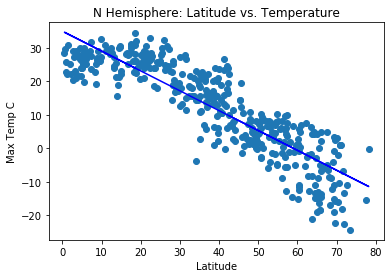

In [68]:
# Graphing the equation on the plot
regress_a = linreg(list(North_hemisphere_df["Lat"]), list(North_hemisphere_df["Max Temp"]))
plt.ylabel("Max Temp C")
plt.title("N Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_a,(0,-30),fontsize=15,color="red") 

The r value is: 0.7027912427687993


Text(-30, 10, 'y = 0.34x + 28.48')

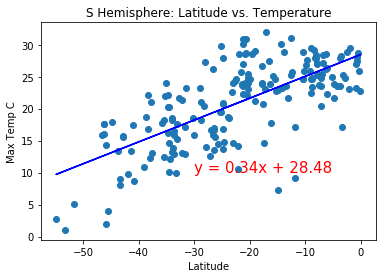

In [71]:
# Graphing the equation on the plot 
regress_b = linreg(list(South_hemisphere_df["Lat"]), list(South_hemisphere_df["Max Temp"]))
plt.ylabel("Max Temp C")
plt.title("S Hemisphere: Latitude vs. Temperature")
plt.annotate(regress_b,(-30,10),fontsize=15,color="red")

The r value is: 0.20868563317720423


Text(40, 20, 'y = 0.23x + 59.82')

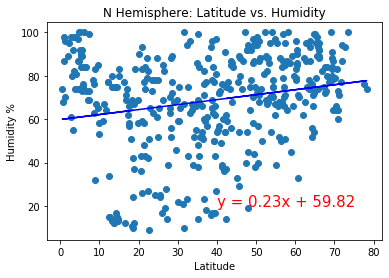

In [72]:
# Graphing the equation on the plot 
regress_c = linreg(list(North_hemisphere_df["Lat"]), list(North_hemisphere_df["Humidity"]))
plt.ylabel("Humidity %")
plt.title("N Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_c,(40,20),fontsize=15,color="red")

The r value is: 0.30124676485333063


Text(-25, 20, 'y = 0.38x + 82.82')

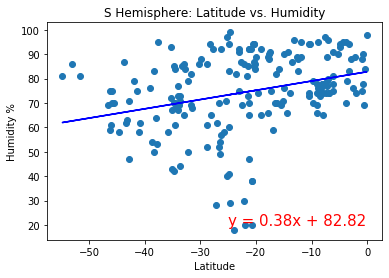

In [73]:
# Graphing the equation on the plot 
regress_d = linreg(list(South_hemisphere_df["Lat"]), list(South_hemisphere_df["Humidity"]))
plt.ylabel("Humidity %")
plt.title("S Hemisphere: Latitude vs. Humidity")
plt.annotate(regress_d,(-25,20),fontsize=15,color="red")

The r value is: 0.08782909297001794


Text(35, 30, 'y = 0.17x + 49.56')

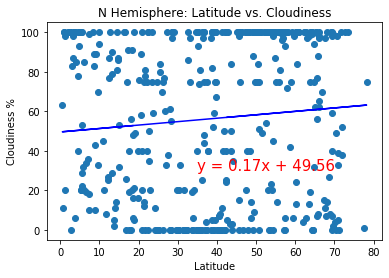

In [74]:
# Graphing the equation on the plot
regress_e = linreg(list(North_hemisphere_df["Lat"]), list(North_hemisphere_df["Cloudiness"]))
plt.ylabel("Cloudiness %")
plt.title("N Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_e,(35,30),fontsize=15,color="red") 

The r value is: 0.38094635922935244


Text(-55, 55, 'y = 1.19x + 83.03')

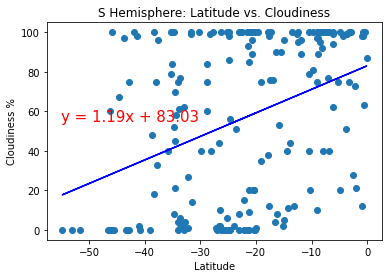

In [75]:
# Graphing the equation on the plot
regress_f = linreg(list(South_hemisphere_df["Lat"]), list(South_hemisphere_df["Cloudiness"]))
plt.ylabel("Cloudiness %")
plt.title("S Hemisphere: Latitude vs. Cloudiness")
plt.annotate(regress_f,(-55,55),fontsize=15,color="red") 

The r value is: 0.1945031217713923


Text(10, 12.5, 'y = 0.02x + 2.85')

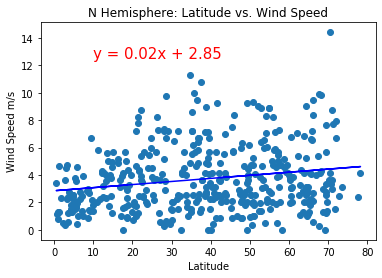

In [76]:
# Graphing the equation on the plot 
regress_g = linreg(list(North_hemisphere_df["Lat"]), list(North_hemisphere_df["Wind Speed"]))
plt.ylabel("Wind Speed m/s")
plt.title("N Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_g,(10,12.5),fontsize=15,color="red")

The r value is: -0.26684343743150163


Text(-50, 10, 'y = -0.05x + 1.98')

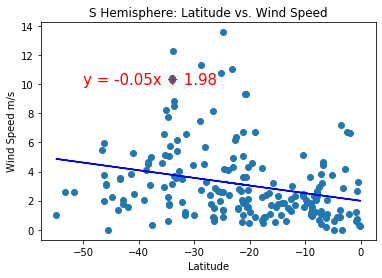

In [77]:
# Graphing the equation on the plot 
regress_h = linreg(list(South_hemisphere_df["Lat"]), list(South_hemisphere_df["Wind Speed"]))
plt.ylabel("Wind Speed m/s")
plt.title("S Hemisphere: Latitude vs. Wind Speed")
plt.annotate(regress_h,(-50,10),fontsize=15,color="red") 